<a href="https://colab.research.google.com/github/alexrods/cars-bikes-detection/blob/main/Notebooks/4_0_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tf_slim
!pip install tf-models-official
!pip install lvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 27.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 KB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 105.3 MB/s eta 0:00:00
  Created wheel for seqeval: filename=se

In [ ]:
import os
%cd /content
!git clone --quiet https://github.com/tensorflow/models.git
%cd /content/models/
#!git checkout 58d19c67e1d30d905dd5c6e5092348658fed80af
!apt-get update && apt-get install -y -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -q Cython contextlib2 pillow lxml matplotlib
!pip install -q pycocotools
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
!python object_detection/builders/model_builder_test.py

/content
/content/models
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [920 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-backports In

In [ ]:
import zipfile
local_zip = "/content/fine_tuned_model.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content/fine_tuned_model")
zip_ref.close()

In [ ]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import tensorflow as tf
import numpy as np

## Revisar que la ruta sea la misma de la carpeta.
PATH_TO_MODEL_DIR = "/content/fine_tuned_model/content/fine_tuned_model"
PATH_TO_SAVE_MODEL = PATH_TO_MODEL_DIR + "/saved_model"
detect_fn = tf.saved_model.load(PATH_TO_SAVE_MODEL)


In [ ]:
label_map_pbtxt_fname = '/content/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(label_map_pbtxt_fname)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image_path = '/content/image_content_26213439_20160610175632.webp'

# La convertimos a array
image_np = np.array(Image.open(image_path))

# La convertimos a tensor y la agregamos una dimensión para que pueda leerla nuestro modelo
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]

# Realizamos la detección del objeto
detections = detect_fn(input_tensor)

In [ ]:
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0,:num_detections].numpy() for key, value in detections.items()}

detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'],
    detections['detection_scores'],
    category_index,
    max_boxes_to_draw=200,
    min_score_thresh=0.30,
    use_normalized_coordinates = True
)


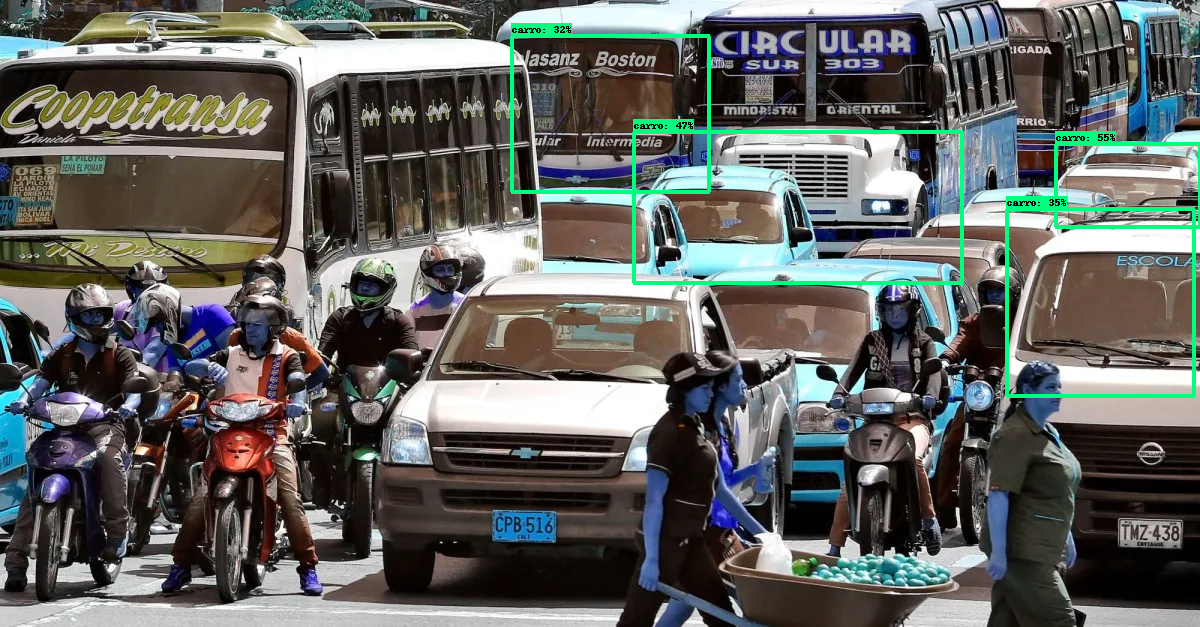

In [ ]:
cv2_imshow(image_np_with_detections)

In [ ]:
import numpy as np
import imutils
import time
import dlib
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from imutils.video import VideoStream
from imutils.video import FPS
from centroidtracker import CentroidTracker
from trackableobject import TrackableObject

In [ ]:
PATH_VIDEO = "/content/test_video.mp4"

PATH_OUTPUT = "/content/video_out.mp4"

SKIP_FPS = 30
TRESHOLD = 0.5

vs = cv2.VideoCapture(PATH_VIDEO)

writer = None

W = int(vs.get(cv2.CAP_PROP_FRAME_WIDTH))
H = int(vs.get(cv2.CAP_PROP_FRAME_HEIGHT))

ct = CentroidTracker(maxDisappeared= 40, maxDistance = 50)

trackers = []
trackableObjects = {}

totalFrame = 0
totalDown = 0
totalUp = 0

DIRECTION_PEOPLE = True

POINT = [0, int((H/2) - H*0.1), W, int(H*0.1)]

fps = FPS().start()

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
writer = cv2.VideoWriter(PATH_OUTPUT, fourcc, 20.0, (W, H), True)

# Bucle que recorre todo el video
while True:
  # Leemos el primer frame
  ret, frame = vs.read()

  # Si ya no hay más frame, significa que el video termino y por tanto se sale del bucle
  if frame is None:
    break
  
  status = "Waiting"
  rects = []

  # Nos saltamos los frames especificados.
  if totalFrame % SKIP_FPS == 0:
    status = "Detecting"
    trackers = []
    # Tomamos la imagen la convertimos a array luego a tensor
    image_np = np.array(frame)

    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = input_tensor[tf.newaxis, ...]

    # Predecimos los objectos y clases de la imagen
    detections = detect_fn(input_tensor)

    detection_scores = np.array(detections["detection_scores"][0])
    # Realizamos una limpieza para solo obtener las clasificaciones mayores al umbral.
    detection_clean = [x for x in detection_scores if x >= TRESHOLD]

    # Recorremos las detecciones
    for x in range(len(detection_clean)):
      idx = int(detections['detection_classes'][0][x])
      # Tomamos los bounding box 
      ymin, xmin, ymax, xmax = np.array(detections['detection_boxes'][0][x])
      box = [xmin, ymin, xmax, ymax] * np.array([W,H, W, H])

      (startX, startY, endX, endY) = box.astype("int")

      # Con la función de dlib empezamos a hacer seguimiento de los boudiung box obtenidos
      tracker = dlib.correlation_tracker()
      rect = dlib.rectangle(startX, startY, endX, endY)
      tracker.start_track(frame, rect)

      trackers.append(tracker)
  else:
    # En caso de que no hagamos detección haremos seguimiento
    # Recorremos los objetos que se les está realizando seguimiento
    for tracker in trackers:
      status = "Tracking"
      # Actualizamos y buscamos los nuevos bounding box
      tracker.update(frame)
      pos = tracker.get_position()

      startX = int(pos.left())
      startY = int(pos.top())
      endX = int(pos.right())
      endY = int(pos.bottom())

      rects.append((startX, startY, endX, endY))

  # Dibujamos el umbral de conteo
  cv2.rectangle(frame, (POINT[0], POINT[1]), (POINT[0]+ POINT[2], POINT[1] + POINT[3]), (255, 0, 255), 2)

  objects = ct.update(rects)

  # Recorremos cada una de las detecciones
  for (objectID, centroid) in objects.items():
    # Revisamos si el objeto ya se ha contado
    to = trackableObjects.get(objectID, None)
    if to is None:
      to = TrackableObject(objectID, centroid)

    else:
      # Si no se ha contado, analizamos la dirección del objeto
      y = [c[1] for c in to.centroids]
      direction = centroid[1] - np.mean(y)
      to.centroids.append(centroid)
      if not to.counted:
        if centroid[0] > POINT[0] and centroid[0] < (POINT[0]+ POINT[2]) and centroid[1] > POINT[1] and centroid[1] < (POINT[1]+POINT[3]):
          if DIRECTION_PEOPLE:
            if direction >0:
              totalUp += 1
              to.counted = True
            else:
              totalDown +=1
              to.counted = True
          else:
            if direction <0:
              totalUp += 1
              to.counted = True
            else:
              totalDown +=1
              to.counted = True

    trackableObjects[objectID] = to

    # Dibujamos el centroide y el ID de la detección encontrada
    text = "ID {}".format(objectID)
    cv2.putText(frame, text, (centroid[0]-10, centroid[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
    cv2.circle(frame, (centroid[0], centroid[1]), 4, (0,255,0), -1)
  
  # Totalizamos los resultados finales
  info = [
          ("Subiendo", totalUp),
          ("Bajando", totalDown),
          ("Estado", status),
  ]

  for (i, (k,v)) in enumerate(info):
    text = "{}: {}".format(k,v)
    cv2.putText(frame, text, (10, H - ((i*20) + 20)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)

  # Almacenamos el framme en nuestro video resultante.
  writer.write(frame)
  totalFrame += 1
  fps.update()

# Terminamos de analizar FPS y mostramos resultados finales
fps.stop()

print("Tiempo completo {}".format(fps.elapsed()))
print("Tiempo aproximado por frame {}".format(fps.fps()))

# Cerramos el stream the almacenar video y de consumir el video.
writer.release()
vs.release()



Tiempo completo 88.507328
Tiempo aproximado por frame 19.987045592428235
